# Modeling with Scikit-Learn Regressor
- The support vector machine (SVM) is a data-classification algorithm that assigns new data elements to one of the labeled categories, it assumes that the data in question contains some possible target values. In Machine Learning or Data Science are quite familiar with the term Support Vector Machine, but Support Vector Regression (SVR) is a bit different from SVM. As the name suggests the SVR is a regression algorithm, so we can use SVR for working with continuous Values instead of Classification which is SVM. The basic idea of SVR is to find a function f(y) that has most ε deviation from the actually obtained target for the training data yi, and at the same time is as flat as possible. In other words, **we do not care about the errors as long as they are less than ε**. **This property determines the SVR to be less sensitive to outliers than the quadratic loss function.**

## 1. Preprocessing
- Lable-Encoding
- Log nomalization
- Standard scaling

# 2. Regressors : Scikit-Learn
- DecisionTree Regressor
- RandomForest Regressor
- Support Vector Regressor
- XGB Regressor
- Cross-validation and Results

# 3. Testing

In [31]:
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from scipy import stats
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('github'))))
import utils.statsmodel_helper as sh
import utils.feature_selection as fs
import utils.preprocessing as pp
import utils.error_calculator as ec
import utils.helpermodeling as hm
from scipy import stats

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, cross_val_predict, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

# model import
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [2]:
df_train = pd.read_csv('../input/train_macro_without_outliers.csv', index_col=0)
df_train_augmented = pd.read_csv('../input/train_macro_with_outliers.csv', index_col=0)
df_test = pd.read_csv('../input/test_macro.csv', index_col=0)

In [3]:
df_train.tail(2)

,usdrub,full_sq,life_sq,floor,num_room,kitch_sq,state,product_type,area_m,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,0_17_all,raion_build_count_with_material_info,build_count_brick,build_count_monolith,raion_build_count_with_builddate_info,build_count_before_1920,metro_min_avto,kindergarten_km,school_km,park_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_min_walk,water_1line,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,office_count_500,office_sqm_500,cafe_count_500,cafe_count_500_price_1000,cafe_count_500_price_1500,leisure_count_500,office_count_1000,office_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,office_count_1500,office_sqm_1500,trc_count_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_high,mosque_count_1500,leisure_count_1500,sport_count_1500,green_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_max_price_avg,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_high,mosque_count_2000,sport_count_2000,market_count_2000,green_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,big_church_count_3000,church_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,room_size,avg_price_sub_area,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30472,55.2655,64,32.1,5.1,2.1,11.1,2.0,Investment,6050064.566,6.1,8.1,0.1,5469.953703,2.1,1.1,11.1,no,4.1,5.1,no,no,no,yes,no,no,no,no,10896,185.0,4.1,9.1,186.0,0.977191,3.477814,0.203020,0.230667,1.772506,82.750340,9.128624,3.138330,no,8.940313,11.752036,12.872535,13.622569,0.960608,no,2.174001,no,15.303338,5.458660,19.591574,8.011139,0.718679,1.971656,6.417997,3.881523,2.711199,0.512813,0.731280,2.730674,2.374106,2.210500,1.625064,24.788893,2.428096,1.982450,2.440429,1.208672,1.304798,1.440017,0.230667,1.644053,0.576021,2.748055,2.088193,4.119706,1.800186,0.134566,satisfactory,0.1,0.1,3.1,0.1,3.1,0.1,0.1,0.1,13.1,0.1,6.1,5.1,0.1,0.1,10.1,1.1,37800.1,1.1,42.1,646.34,1097.56,871.95,1.1,15.1,13.1,8.1,5.1,0.1,0.1,0.1,15.1,32.00,2.1,107800.1,10.1,136296.1,67.1,1195.31,3.1,17.1,23.1,15.1,9.1,0.1,0.1,18.1,2.1,30.31,15.1,473168.1,25.1,481350.1,2.1,17.1,2.1,33.1,4.1,30.36,39.1,1225712.1,45.1,1464521.1,6.1,31.1,1.1,4.1,65.1,7.1,16.1,1.392420e+07,13500000
30473,55.2655,43,28.1,1.1,2.1,6.1,2.0,Investment,4395332.782,4.1,4.1,0.1,3184.953703,2.1,0.1,7.1,no,5.1,1.1,no,no,no,yes,n

In [4]:
df_train_augmented.tail(2)

,usdrub,full_sq,life_sq,floor,num_room,kitch_sq,state,product_type,area_m,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,0_17_all,raion_build_count_with_material_info,build_count_brick,build_count_monolith,raion_build_count_with_builddate_info,build_count_before_1920,metro_min_avto,kindergarten_km,school_km,park_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_min_walk,water_1line,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,office_count_500,office_sqm_500,cafe_count_500,cafe_count_500_price_1000,cafe_count_500_price_1500,leisure_count_500,office_count_1000,office_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,office_count_1500,office_sqm_1500,trc_count_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_high,mosque_count_1500,leisure_count_1500,sport_count_1500,green_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_max_price_avg,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_high,mosque_count_2000,sport_count_2000,market_count_2000,green_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,big_church_count_3000,church_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,room_size,avg_price_sub_area,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30472,55.2655,64,32.1,5.1,2.1,11.1,2.0,Investment,6050064.566,6.1,8.1,0.1,5469.953703,2.1,1.1,11.1,no,4.1,5.1,no,no,no,yes,no,no,no,no,10896,185.0,4.1,9.1,186.0,0.977191,3.477814,0.203020,0.230667,1.772506,82.750340,9.128624,3.138330,no,8.940313,11.752036,12.872535,13.622569,0.960608,no,2.174001,no,15.303338,5.458660,19.591574,8.011139,0.718679,1.971656,6.417997,3.881523,2.711199,0.512813,0.731280,2.730674,2.374106,2.210500,1.625064,24.788893,2.428096,1.982450,2.440429,1.208672,1.304798,1.440017,0.230667,1.644053,0.576021,2.748055,2.088193,4.119706,1.800186,0.134566,satisfactory,0.1,0.1,3.1,0.1,3.1,0.1,0.1,0.1,13.1,0.1,6.1,5.1,0.1,0.1,10.1,1.1,37800.1,1.1,42.1,646.34,1097.56,871.95,1.1,15.1,13.1,8.1,5.1,0.1,0.1,0.1,15.1,32.00,2.1,107800.1,10.1,136296.1,67.1,1195.31,3.1,17.1,23.1,15.1,9.1,0.1,0.1,18.1,2.1,30.31,15.1,473168.1,25.1,481350.1,2.1,17.1,2.1,33.1,4.1,30.36,39.1,1225712.1,45.1,1464521.1,6.1,31.1,1.1,4.1,65.1,7.1,16.1,1.392420e+07,13500000
30473,55.2655,43,28.1,1.1,2.1,6.1,2.0,Investment,4395332.782,4.1,4.1,0.1,3184.953703,2.1,0.1,7.1,no,5.1,1.1,no,no,no,yes,n

In [5]:
df_test.tail(2)

,usdrub,full_sq,life_sq,floor,num_room,kitch_sq,state,product_type,area_m,raion_popul,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,young_all,work_all,ekder_all,0_17_all,raion_build_count_with_material_info,build_count_brick,build_count_monolith,raion_build_count_with_builddate_info,build_count_before_1920,metro_min_avto,kindergarten_km,school_km,park_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_min_walk,water_1line,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,office_count_500,office_sqm_500,cafe_count_500,cafe_count_500_price_1000,cafe_count_500_price_1500,leisure_count_500,office_count_1000,office_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,office_count_1500,office_sqm_1500,trc_count_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_high,mosque_count_1500,leisure_count_1500,sport_count_1500,green_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_max_price_avg,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_high,mosque_count_2000,sport_count_2000,market_count_2000,green_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,room_size,avg_price_sub_area
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38134,65.6745,34.8,19.8,8.0,1.0,6.4,2.0,Investment,7128794.338,145576,7,7,1,1031.546494,1,0,7,no,6,0,no,no,no,no,no,yes,no,no,13595,104635,27346,14976,195.0,0.0,3.0,195.0,0.0,1.469263,0.073023,0.208540,2.950264,60.226932,6.164570,1.392524,no,11.538742,14.88307,16.528376,17.137752,1.425847,no,1.425847,no,17.433375,2.160649,6.997322,5.259407,3.258864,2.011375,6.365003,4.649813,1.280650,0.542683,1.277750,1.116351,6.449755,3.994409,2.596009,4.655112,1.350505,3.679888,1.795903,0.469357,1.467622,0.676312,0.208540,2.411682,0.331122,8.247379,12.564484,3.127103,3.618234,0.322872,poor,0,0,3,2,0,0,0,0,20,1,9,4,0,0,6,2,54500,6,27,630

## 1. Preprocessing

In [6]:
onem = df_train_augmented[df_train_augmented.price_doc == 1000000]
twom = df_train_augmented[df_train_augmented.price_doc == 2000000]
print(df_train.shape, onem.shape, twom.shape)
df_train_augmented = df_train.append(onem, ignore_index=True)
df_train_augmented = df_train_augmented.append(twom, ignore_index=True)
print(df_train.shape, df_train_augmented.shape, onem.shape, twom.shape)

(25037, 151) (744, 151) (756, 151)
(25037, 151) (26537, 151) (744, 151) (756, 151)


In [7]:
cate_features = [
 'detention_facility_raion',
 'culture_objects_top_25',
 'railroad_1line',
 'big_market_raion',
 'incineration_raion',
 'big_road1_1line',
 'radiation_raion',
 'railroad_terminal_raion',
 'ecology',
 'thermal_power_plant_raion',
 'oil_chemistry_raion',
 'nuclear_reactor_raion',
 'product_type',
 'water_1line'
]

numeric_features = list(df_train.columns.drop(cate_features + ['price_doc']).values)

### Lable-Encoding

In [8]:
for f in cate_features:
    df_train[f].fillna(df_train[f].value_counts().index[0], inplace=True)
    df_test[f].fillna(df_test[f].value_counts().index[0], inplace=True)
    df_train_augmented[f].fillna(df_train_augmented[f].value_counts().index[0], inplace=True)
    
    lbl = LabelEncoder()
    lbl.fit(df_train[f].values)
    df_train[f] = lbl.transform(df_train[f].values)
    df_test[f] = lbl.transform(df_test[f].values)
    df_train_augmented[f] = LabelEncoder().fit_transform(df_train_augmented[f].values)

### Log nomalizaion

In [9]:
# Log Normalization of Numeric Features
numeric_features = list(df_train.columns.drop(cate_features + ['price_doc']).values)

for column in numeric_features + ['price_doc']:
    if stats.skew(df_train[column].values) > 1:
        df_train[column] = np.log(df_train[column] + 1)  
        df_train_augmented[column] = np.log(df_train_augmented[column] + 1)
        if column in df_test.columns.values:
            df_test[column]  = np.log(df_test[column] + 1)

### Standard scaling

In [10]:
# 평균 0 표준편차 1이 되도록 스케일링
train_scaler = StandardScaler()
train_scaler.fit(df_train[numeric_features])

scaled_numeric_train_X = train_scaler.transform(df_train[numeric_features])
df_scaled_numeric_train_X = pd.DataFrame(scaled_numeric_train_X, index=df_train.index, columns=numeric_features)
df_train = pd.concat([df_scaled_numeric_train_X, df_train[cate_features], df_train['price_doc']], axis=1)

scaled_numeric_test_X = train_scaler.transform(df_test[numeric_features])
df_scaled_numeric_test_X = pd.DataFrame(scaled_numeric_test_X, index=df_test.index, columns=numeric_features)
df_test = pd.concat([df_scaled_numeric_test_X, df_train[cate_features]], axis=1)

scaled_numeric_train_X = train_scaler.transform(df_train_augmented[numeric_features])
df_scaled_numeric_train_X = pd.DataFrame(scaled_numeric_train_X, index=df_train_augmented.index, columns=numeric_features)
df_train_augmented = pd.concat([df_scaled_numeric_train_X, df_train_augmented[cate_features], df_train_augmented['price_doc']],axis=1)

# 2. Regressors : Scikit-Learn
- Decision Tree Regressor
- RandomForest Regressor
- Support Vector Regressor
- XGB(Extreme Gradient Boosting) Regressor
- Cross-validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_train[numeric_features+cate_features], df_train['price_doc'], test_size=0.2, random_state=1)

In [12]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape) 

(20029, 150)
(5008, 150)
(20029,)
(5008,)


(None, None, None, None)

### Decision Tree Regressor

In [13]:
dtr = DecisionTreeRegressor()
y_train_dtr, y_test_dtr = hm.regression(dtr, X_train, X_test, y_train)
hm.scores('Decision Tree Regressor', y_train, y_test, y_train_dtr, y_test_dtr)

______________________________________________
Decision Tree Regressor
______________________________________________
R2 score. Train:  0.9999984444731951
R2 score. Test:  0.8878505744432004
______________________________________________
MSE score. Train:  2.559812161718295e-07
MSE score. Test:  0.018021403277016824
______________________________________________
RMSE score. Train:  0.000505945862886366
RMSE score. Test:  0.000505945862886366
______________________________________________
MAE score. Train:  1.1813579759579934e-05
MAE score. Test:  0.09362517217527323


### cross validation

In [14]:
cross_val_score(dtr, X_train, y_train, scoring='r2', cv=cv)

array([0.88088943, 0.88460029, 0.88667239, 0.89254839, 0.87991116])

In [15]:
cross_val_score(dtr, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

array([-6.84622313e-05, -6.71336866e-05, -6.36488135e-05, -6.29405095e-05,
       -6.85301788e-05])

## RandomForest Regressor

In [16]:
rfr = RandomForestRegressor()
y_train_rfr, y_test_rfr = hm.regression(rfr, X_train, X_test, y_train)
hm.scores('RandomForest Regressor', y_train, y_test, y_train_rfr, y_test_rfr)

______________________________________________
RandomForest Regressor
______________________________________________
R2 score. Train:  0.9892532486393286
R2 score. Test:  0.9369402692921134
______________________________________________
MSE score. Train:  0.001768511140086323
MSE score. Test:  0.01013313115055901
______________________________________________
RMSE score. Train:  0.04205366975765995
RMSE score. Test:  0.04205366975765995
______________________________________________
MAE score. Train:  0.028198795059761323
MAE score. Test:  0.07274171779217203


### cross validation

In [17]:
cross_val_score(rfr, X_train, y_train, scoring='r2', cv=cv)

array([0.93789473, 0.93546934, 0.93719597, 0.94128798, 0.94232164])

In [18]:
cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

array([-3.63263693e-05, -3.88683141e-05, -3.74348775e-05, -3.40334050e-05,
       -3.23446239e-05])

## Support Vector Regressor

In [19]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
y_train_rfr, y_test_rfr = hm.regression(svr, X_train, X_test, y_train)
hm.scores('Support Vector Regressor', y_train, y_test, y_train_rfr, y_test_rfr)

______________________________________________
Support Vector Regressor
______________________________________________
R2 score. Train:  0.9396373491444124
R2 score. Test:  0.9333479595719556
______________________________________________
MSE score. Train:  0.00993342238045215
MSE score. Test:  0.010710382989714657
______________________________________________
RMSE score. Train:  0.09966655597768065
RMSE score. Test:  0.09966655597768065
______________________________________________
MAE score. Train:  0.0805124339572726
MAE score. Test:  0.08250316418829293


### cross validation

In [20]:
cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv)

array([0.92603527, 0.92786196, 0.93057546, 0.93106218, 0.9321752 ])

In [21]:
cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

array([-4.25836897e-05, -4.16549545e-05, -4.14320822e-05, -4.03821353e-05,
       -3.99384571e-05])

## XGB Regressor

In [22]:
param_grid = [{
    'max_depth': [10],
    'learning_rate' : [0.1],
    'n_estimators' : [200], 
    'colsample_bytree': [0.5]
}]

xgr = xgb.XGBRegressor()
grid_xgr = GridSearchCV(xgr, param_grid, cv=cv, n_jobs=4, scoring='neg_mean_squared_log_error')
grid_xgr.fit(X_train, y_train)
print(grid_xgr.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [23]:
xgr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
y_train_xgr, y_test_xgr = hm.regression(xgr, X_train, X_test, y_train)
hm.scores('XGB Regressor', y_train, y_test, y_train_xgr, y_test_xgr)

______________________________________________
XGB Regressor
______________________________________________
R2 score. Train:  0.9942823620949907
R2 score. Test:  0.9536069176549754
______________________________________________
MSE score. Train:  0.0009409081861699495
MSE score. Test:  0.0074549507681615345
______________________________________________
RMSE score. Train:  0.030674226741190226
RMSE score. Test:  0.030674226741190226
______________________________________________
MAE score. Train:  0.022291107441474542
MAE score. Test:  0.06313468108948148


In [25]:
cross_val_score(xgr, X_train, y_train, scoring='r2', cv=cv)

array([0.95190466, 0.95188408, 0.95268888, 0.95399904, 0.95499437])

In [26]:
cross_val_score(xgr, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

array([-2.75060889e-05, -2.76654662e-05, -2.79980877e-05, -2.67801483e-05,
       -2.62649730e-05])

In [ ]:
prediction = xgr.predict(X_test)

In [ ]:
len(prediction)

In [ ]:
prediction = grid_xgr.best_estimator_.predict(X_test)
sns.distplot(prediction)

### Cross Validation

In [27]:
def show_results(y_test, pred, measured, preds):
    print('\n')
    print("Train Test Split")
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

    print('\n')
    print("Cross Validation")
    print('RMSE:', np.sqrt(mean_squared_error(measured, preds)))

    fig  = plt.figure(figsize=(8, 4), dpi=100)
    axes1 = fig.add_subplot(121)
    axes1.scatter(y_test, pred, c='red', s=5)
    axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes1.set_title("Train Test Split")
    axes1.set_xlabel('Measured')
    axes1.set_ylabel('Predicted')
    axes2 = fig.add_subplot(122)
    axes2.scatter(measured, preds, c='red', s=5)
    axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes2.set_title("Cross Validation")
    axes2.set_xlabel('Measured')
    axes2.set_ylabel('Predicted')
    fig.tight_layout()
    
    fig  = plt.figure(figsize=(8, 4), dpi=100);
    axes1 = fig.add_subplot(121); 
    axes1.scatter(y_test, y_test-pred, c='red', s=2)
    axes1.set_title("Train Test Split")
    axes1.set_xlabel('Measured')
    axes1.set_ylabel('Residual')
    axes2 = fig.add_subplot(122); 
    axes2.scatter(measured, measured-preds, c='red', s=2)
    axes2.set_title("Cross Validation")
    axes2.set_xlabel('Measured')
    axes2.set_ylabel('Residual')
    fig.tight_layout();
    
    fig  = plt.figure(figsize=(8, 4), dpi=100)
    axes1 = fig.add_subplot(121)
    axes2 = fig.add_subplot(122)
    sns.distplot((y_test-pred), bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5, "gridsize":1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "red"})
    sns.distplot((measured-preds), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5, "gridsize":1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "red"})
    axes1.set_title("Train Test Split")
    axes2.set_title("Cross Validation")
    axes1.set_xlim(-3, 3)
    axes2.set_xlim(-3, 3)
    

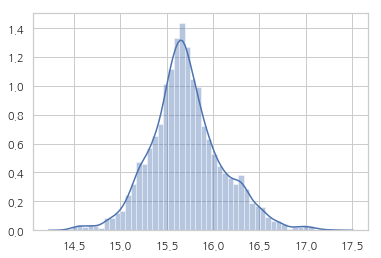

In [29]:
prediction = grid_xgr.best_estimator_.predict(X_test)
sns.distplot(prediction)

In [32]:
predictions = cross_val_predict(grid_xgr.best_estimator_, 
                                df_train[numeric_features+cate_features], 
                                df_train['price_doc'],
                                cv=cv)



Train Test Split
RMSE: 0.0863420567751402


Cross Validation
RMSE: 0.0866284011319188


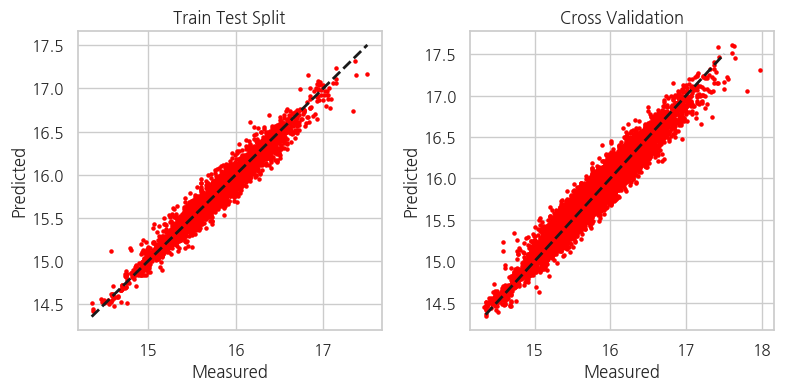

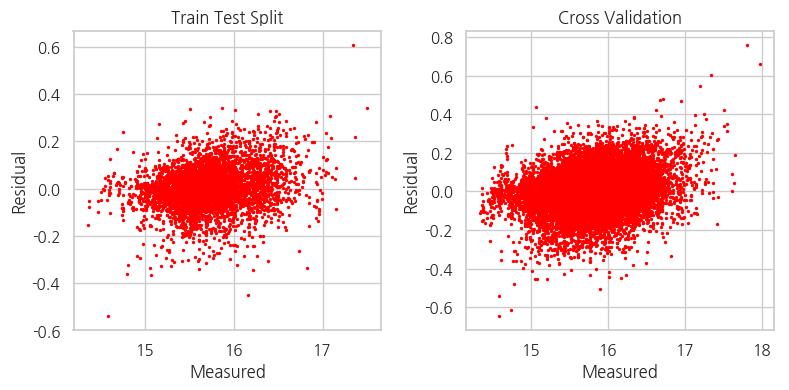

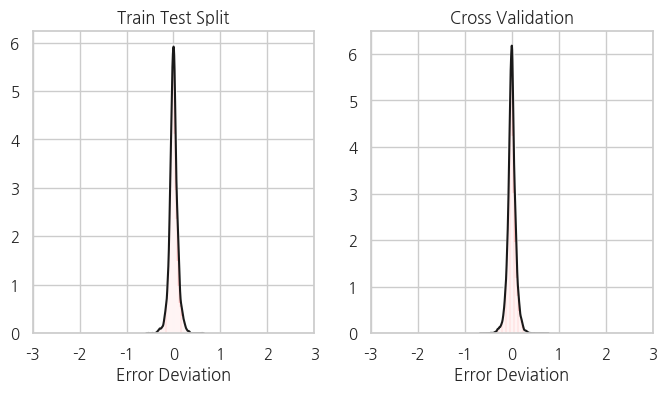

In [33]:
show_results(y_test, prediction, df_train['price_doc'], predictions)

## Feature Importance

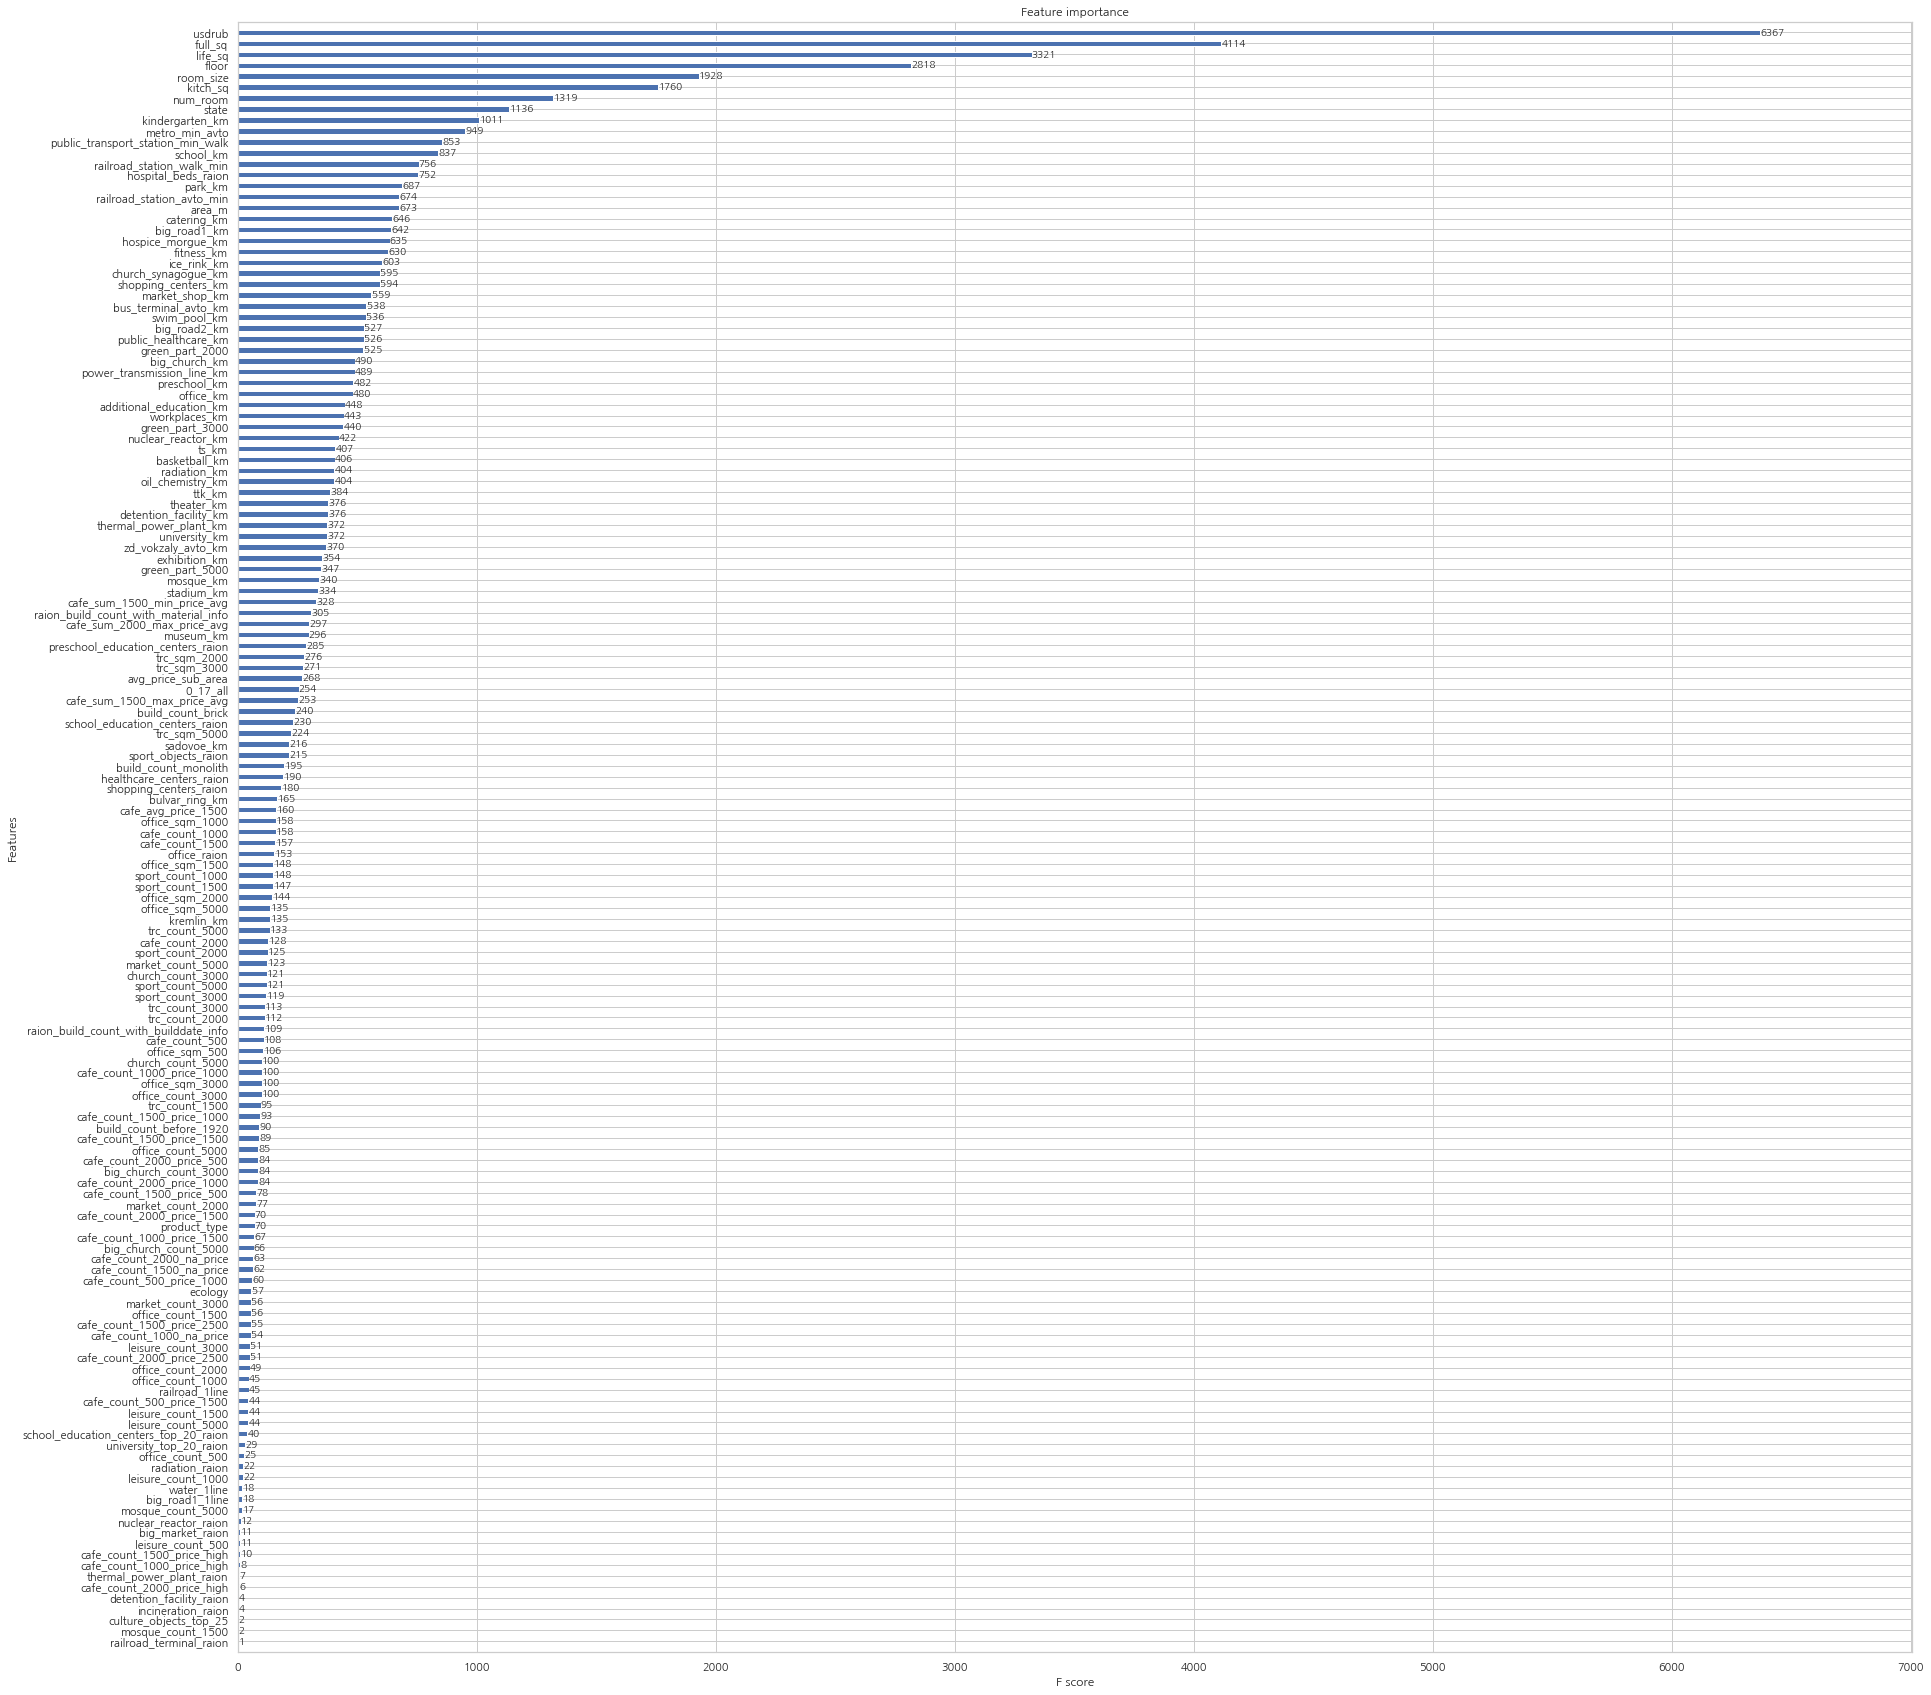

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
xgb.plot_importance(grid_xgr.best_estimator_, height=0.5, ax=ax)

In [40]:
# test.csv 예측
test_pred = grid_xgr.best_estimator_.predict(df_test)

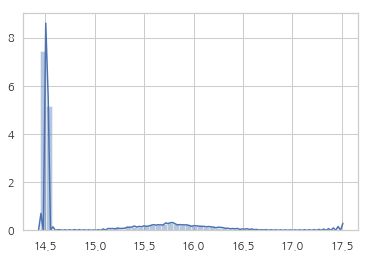

In [41]:
sns.distplot(test_pred)